#### Importing necessary libraries :

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime as dt 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import PredictionErrorDisplay, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

#### Importing the dataset:

In [20]:
df = pd.read_excel("C:/Users/Lenovo/Desktop/ML PFE/dataset_revisedVersion.xlsx")

#### Dropping the columns we don't need :

In [21]:
df.drop(['Invoice ID','Branch','gross income'],axis=1,inplace=True)

In [22]:
df.head()

,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,Rating
0,Yangon,Member,Female,Health and beauty,74.69,7,3.7345,522.83,1/5/2019,13:08:00,Ewallet,110.429824,78.878445,9.1
1,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,0.7640,76.40,3/8/2019,10:29:00,Cash,43.310658,43.310658,9.6
2,Yangon,Normal,Male,Home and lifestyle,46.33,7,2.3165,324.31,3/3/2019,13:23:00,Credit card,97.786823,69.847731,7.4
3,Yangon,Member,Male,Health and beauty,58.22,8,2.9110,465.76,1/27/2019,20:33:00,Ewallet,119.089747,74.431092,8.4
4,Yangon,Normal,Male,Sports and travel,86.31,7,4.3155,604.17,2/8/2019,10:37:00,Ewallet,113.661932,81.187094,5.3


## Data transformation:

#### Transforming the date to an ordinal number (number of days):

In [23]:
df['Date'] = pd.to_datetime(df['Date']) 
df['Date']=df['Date'].map(dt.datetime.toordinal)

#### Transforming the time to an ordinal number (number of minutes):

In [24]:
df['Hour'] = df['Time'].apply(lambda x: x.hour)
df['Minute'] = df['Time'].apply(lambda x: x.minute)

df['Minutes_Since_Midnight'] = df['Hour'] * 60 + df['Minute']
df.drop(['Hour','Minute','Time'],inplace=True,axis=1)

In [25]:
df.head()

,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross margin percentage,Rating,Minutes_Since_Midnight
0,Yangon,Member,Female,Health and beauty,74.69,7,3.7345,522.83,737064,Ewallet,110.429824,78.878445,9.1,788
1,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,0.7640,76.40,737126,Cash,43.310658,43.310658,9.6,629
2,Yangon,Normal,Male,Home and lifestyle,46.33,7,2.3165,324.31,737121,Credit card,97.786823,69.847731,7.4,803
3,Yangon,Member,Male,Health and beauty,58.22,8,2.9110,465.76,737086,Ewallet,119.089747,74.431092,8.4,1233
4,Yangon,Normal,Male,Sports and travel,86.31,7,4.3155,604.17,737098,Ewallet,113.661932,81.187094,5.3,637


#### Ordinal Label Encoding:

In [26]:
le=LabelEncoder()
list_cate = ['City', 'Customer type', 'Gender', 'Product line', 'Payment']
for i in list_cate:
    df[i]=le.fit_transform(df[i])

In [27]:
df.head()

,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross margin percentage,Rating,Minutes_Since_Midnight
0,2,0,0,3,74.69,7,3.7345,522.83,737064,2,110.429824,78.878445,9.1,788
1,1,1,0,0,15.28,5,0.7640,76.40,737126,0,43.310658,43.310658,9.6,629
2,2,1,1,4,46.33,7,2.3165,324.31,737121,1,97.786823,69.847731,7.4,803
3,2,0,1,3,58.22,8,2.9110,465.76,737086,2,119.089747,74.431092,8.4,1233
4,2,1,1,5,86.31,7,4.3155,604.17,737098,2,113.661932,81.187094,5.3,637


## Model building:

### Defining the target variable

In [28]:
y=df['Total']
X=df.drop('Total',axis=1)

### Splitting the dataset into training and testing sets (80% for training and 20% for testing)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression

##### Defining the model 

In [27]:
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

##### Training / Testing score

In [28]:
print(f"Train score: {round(model.score(X_train, y_train), 4) * 100} % \nTest score: {round(model.score(X_test, y_test), 4) * 100} %")

Train score: 98.75 % 
Test score: 98.79 %


##### Feature importance

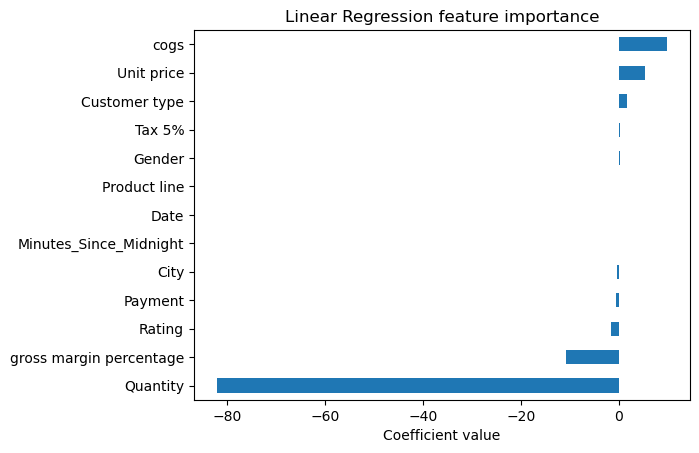

In [29]:
pd.Series(model.coef_, index=X_train.columns).sort_values().plot(kind='barh');
plt.xlabel('Coefficient value')
plt.title('Linear Regression feature importance')
plt.show();

##### Mesuring the error:

In [30]:
mae_train = mean_absolute_error(y_train, model.predict(X_train))
y_pred = model.predict(X_test)
mae_test = mean_absolute_error(y_test, y_pred)
scores = {
    "MAE on training set": f"{mae_train:.2f} $",
    "MAE on testing set": f"{mae_test:.2f} $",
}

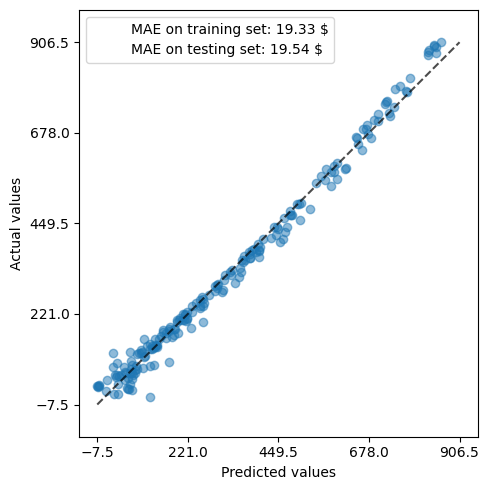

In [31]:
_, ax = plt.subplots(figsize=(5, 5))
display = PredictionErrorDisplay.from_predictions(
    y_test, y_pred, kind="actual_vs_predicted", ax=ax, scatter_kwargs={"alpha": 0.5}
)
for name, score in scores.items():
    ax.plot([], [], " ", label=f"{name}: {score}")
ax.legend(loc="upper left")
plt.tight_layout()

### KNN with GridSearchCV:

##### Defining and fitting the model using GridSearchCV

In [32]:
param_grid = {'n_neighbors': np.arange(1, 20), 'metric': ['euclidean', 'manhattan']}
grid = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

##### Training / Testing score

In [33]:
KNN = grid.best_estimator_
print(f"Train score: {round(KNN.score(X_train, y_train), 4) * 100} % \nTest score: {round(KNN.score(X_test, y_test), 4) * 100} %")

Train score: 97.61999999999999 % 
Test score: 96.88 %


### ElasticNet:

##### Defining the model 

In [30]:
model= ElasticNet()
model.fit(X_train, y_train)

ElasticNet()

##### Training / Testing score

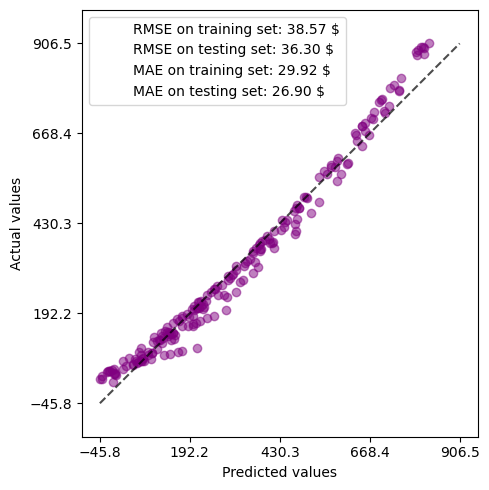

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import PredictionErrorDisplay
import numpy as np

# Assuming these variables are already defined:
# model, X_train, y_train, X_test, y_test

mse_train = mean_squared_error(y_train, model.predict(X_train))
rmse_train = np.sqrt(mse_train)
y_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)

# Calculate MAE for comparison
mae_train = mean_absolute_error(y_train, model.predict(X_train))
mae_test = mean_absolute_error(y_test, y_pred)

scores = {
    "RMSE on training set": f"{rmse_train:.2f} $",
    "RMSE on testing set": f"{rmse_test:.2f} $",
    "MAE on training set": f"{mae_train:.2f} $",
    "MAE on testing set": f"{mae_test:.2f} $",
}

_, ax = plt.subplots(figsize=(5, 5))
display = PredictionErrorDisplay.from_predictions(
    y_test, y_pred, kind="actual_vs_predicted", ax=ax, scatter_kwargs={"alpha": 0.5, "color": "purple"}
)

# Add labels for RMSE and MAE scores
for name, score in scores.items():
    ax.plot([], [], " ", label=f"{name}: {score}", color="purple")

ax.legend(loc="upper left")
plt.tight_layout()
plt.show()


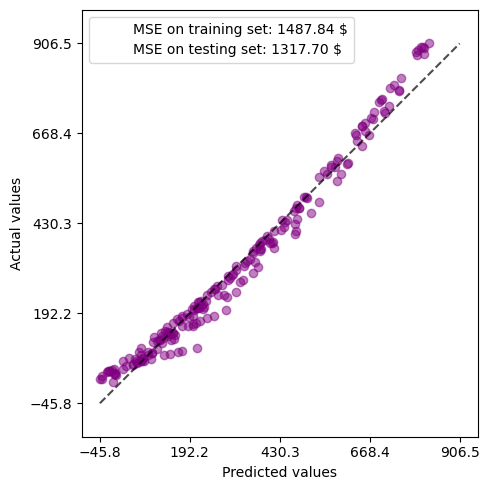

In [18]:
mse_train = mean_squared_error(y_train, model.predict(X_train))
y_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred)
scores = {
    "MSE on training set": f"{mse_train:.2f} $",
    "MSE on testing set": f"{mse_test:.2f} $",
}
_, ax = plt.subplots(figsize=(5, 5))
display = PredictionErrorDisplay.from_predictions(
    y_test, y_pred, kind="actual_vs_predicted", ax=ax, scatter_kwargs={"alpha": 0.5,"color": "purple"}
)
for name, score in scores.items():
    ax.plot([], [], " ", label=f"{name}: {score}")
ax.legend(loc="upper left")
plt.tight_layout()

In [50]:
print(f"Train score: {round(model.score(X_train, y_train), 4) * 100} % \nTest score: {round(model.score(X_test, y_test), 4) * 100} %")

Train score: 97.23 % 
Test score: 97.77 %
